<a href="https://colab.research.google.com/github/farazabir/sentimentanalysis-fb/blob/main/fbgroupsentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langdetect deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.8 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=cd2fd7047e3540fbf535ac6dbc9ce7f8ede12a43f843ee0950c0f447379b3878
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from transformers import pipeline
from tqdm import tqdm
from langdetect import detect
from deep_translator import GoogleTranslator
import torch
from transformers import AutoTokenizer

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
df = pd.read_csv("postdata")

In [7]:
df.head()

,Unnamed: 0,url,post_id,user_url,user_username_raw,content,date_posted,hashtags,num_comments,num_shares,...,post_type,following,price,location,timestamp,input,video_view_count,post_image,post_external_title,original_post
0,0,https://www.facebook.com/groups/86295009563375...,1062112299050865,https://www.facebook.com/profile.php?id=100067...,Abdul Mumit,I am like this King (সম্রাট)🤺,2025-01-30T04:36:52.000Z,[],0,0,...,Post,NaN,NaN,NaN,2025-01-30T05:00:58.935Z,{'url': 'https://www.facebook.com/groups/86295...,NaN,NaN,NaN,NaN
1,1,https://www.facebook.com/groups/86295009563375...,1062112435717518,https://www.facebook.com/people/Muhammad-Ebrah...,Muhammad Ebrahim Ibne-Afaz Rehman,খুব কষ্ট হচ্ছে 😭,2025-01-30T04:36:50.000Z,[],1,0,...,Post,NaN,NaN,NaN,2025-01-30T05:00:58.935Z,{'url': 'https://www.facebook.com/groups/86295...,NaN,NaN,NaN,NaN
2,2,https://www.facebook.com/groups/86295009563375...,1062103489051746,NaN,NaN,আমি এক পুলিশ সদস্য। \nসেদিন এক মেয়ে আমাকে নক দ...,2025-01-30T04:19:52.000Z,[],3,2,...,Post,NaN,NaN,NaN,2025-01-30T05:00:58.935Z,{'url': 'https://www.facebook.com/groups/86295...,NaN,NaN,NaN,NaN
3,3,https://www.facebook.com/groups/86295009563375...,1062029375725824,https://www.facebook.com/mdsabbir.ahmad.90834,Sabbir Ahmed,দুই ব্যাভিচারী নর-নারীকে ১০০ দোররা মা&ড়া হচ্ছে...,2025-01-30T04:19:18.000Z,[],0,0,...,Post,NaN,NaN,NaN,2025-01-30T05:00:58.935Z,{'url': 'https://www.facebook.com/groups/86295...,NaN,NaN,NaN,NaN
4,4,https://www.facebook.com/groups/86295009563375...,1062099402385488,https://www.facebook.com/samiularfinlikhon.likhon,Samiul Arfin Likhon,কলেজ)ভার্সিটি থাকতে প্রেম করা কত মেয়েদের ন্যাক...,2025-01-30T04:03:40.000Z,[],14,3,...,Post,NaN,NaN,NaN,2025-01-30T05:00:58.935Z,{'url': 'https://www.facebook.com/groups/86295...,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3826 non-null   int64  
 1   url                     3826 non-null   object 
 2   post_id                 3826 non-null   int64  
 3   user_url                3180 non-null   object 
 4   user_username_raw       3180 non-null   object 
 5   content                 3540 non-null   object 
 6   date_posted             3826 non-null   object 
 7   hashtags                3500 non-null   object 
 8   num_comments            3826 non-null   int64  
 9   num_shares              3826 non-null   int64  
 10  num_likes_type          3652 non-null   object 
 11  group_name              3826 non-null   object 
 12  group_id                3826 non-null   int64  
 13  group_url               3826 non-null   object 
 14  group_intro             3826 non-null   

In [9]:
df = df[['post_id', 'content', 'date_posted', 'num_comments', 'num_shares', 'likes']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   post_id       3826 non-null   int64  
 1   content       3540 non-null   object 
 2   date_posted   3826 non-null   object 
 3   num_comments  3826 non-null   int64  
 4   num_shares    3826 non-null   int64  
 5   likes         3652 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 179.5+ KB


In [11]:
df = df.dropna(subset=['content']).reset_index(drop=True)

In [12]:
df["content"].head()

,content
0,I am like this King (সম্রাট)🤺
1,খুব কষ্ট হচ্ছে 😭
2,আমি এক পুলিশ সদস্য। \nসেদিন এক মেয়ে আমাকে নক দ...
3,দুই ব্যাভিচারী নর-নারীকে ১০০ দোররা মা&ড়া হচ্ছে...
4,কলেজ)ভার্সিটি থাকতে প্রেম করা কত মেয়েদের ন্যাক...


In [13]:
def translate_text(text):
    try:
        if detect(text) == 'bn':
            return GoogleTranslator(source='bn', target='en').translate(text)
        return text
    except:
        return text

In [19]:
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

def truncate_text(text, max_length=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length)
    return tokenizer.decode(tokens)

In [14]:
df['translated_content'] = df['content'].apply(translate_text)

In [20]:
df['translated_content'] = df['translated_content'].apply(truncate_text)

In [35]:
df['translated_content'].head()

,translated_content
0,<s>I am like this King (সম্রাট)🤺</s>
1,<s>It's very painful 😭</s>
2,"<s>I am a police officer. \nThat day, a girl k..."
3,"<s>Two adulterers are being flogged 100 times,..."
4,<s>I have seen so many girls who were in love ...


In [32]:
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    device=-1
)

Device set to use cpu


In [37]:
batch_size = 16
def get_sentiments(texts):
    try:
        results = sentiment_pipeline(texts, truncation=True)
        return [res['label'] for res in results]
    except Exception as e:
        print(f"Error in sentiment analysis: {e}")
        return ["ERROR"] * len(texts)

data = []
for i in range(0, len(df), batch_size):
    batch_texts = df['translated_content'][i:i+batch_size].tolist()
    df.loc[i:i+batch_size-1, 'sentiment'] = get_sentiments(batch_texts)

In [39]:
print(df['sentiment'].value_counts())

sentiment
NEGATIVE    2560
POSITIVE     980
Name: count, dtype: int64


<ipython-input-41-9f08953ff33f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


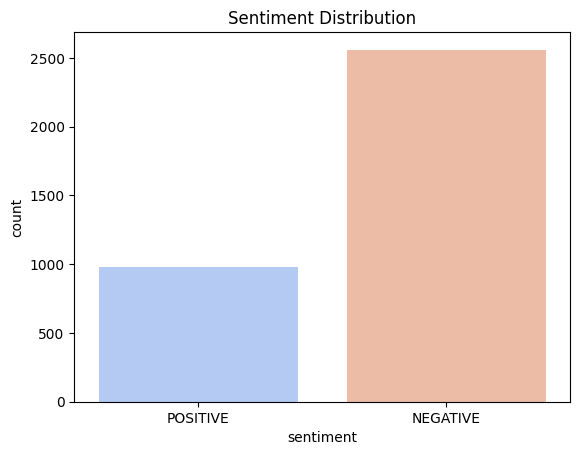

In [41]:
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-50-8ea5428b3ec2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='likes', data=df, palette='coolwarm')


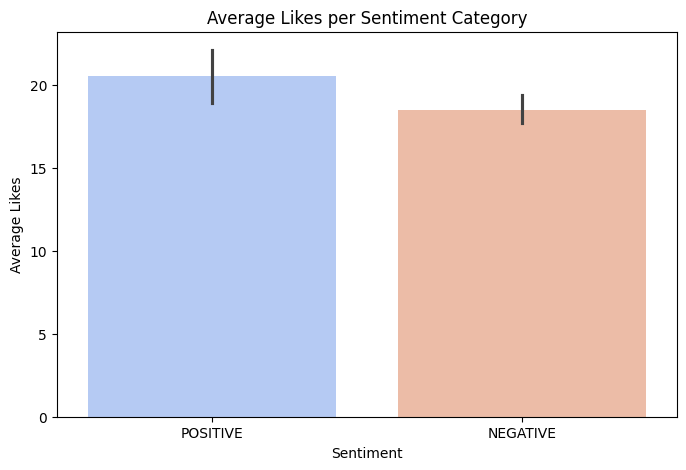

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment', y='likes', data=df, palette='coolwarm')
plt.title('Average Likes per Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Likes')
plt.show()

<ipython-input-51-d44e36365d93>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='num_shares', data=df, palette='coolwarm')


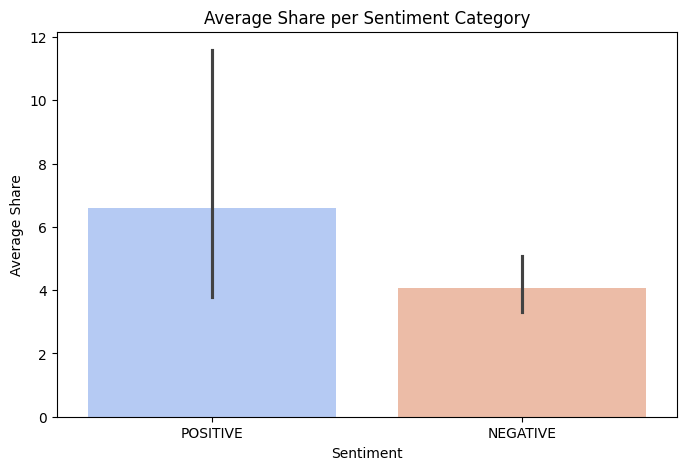

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment', y='num_shares', data=df, palette='coolwarm')
plt.title('Average Share per Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Share')
plt.show()

In [76]:
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

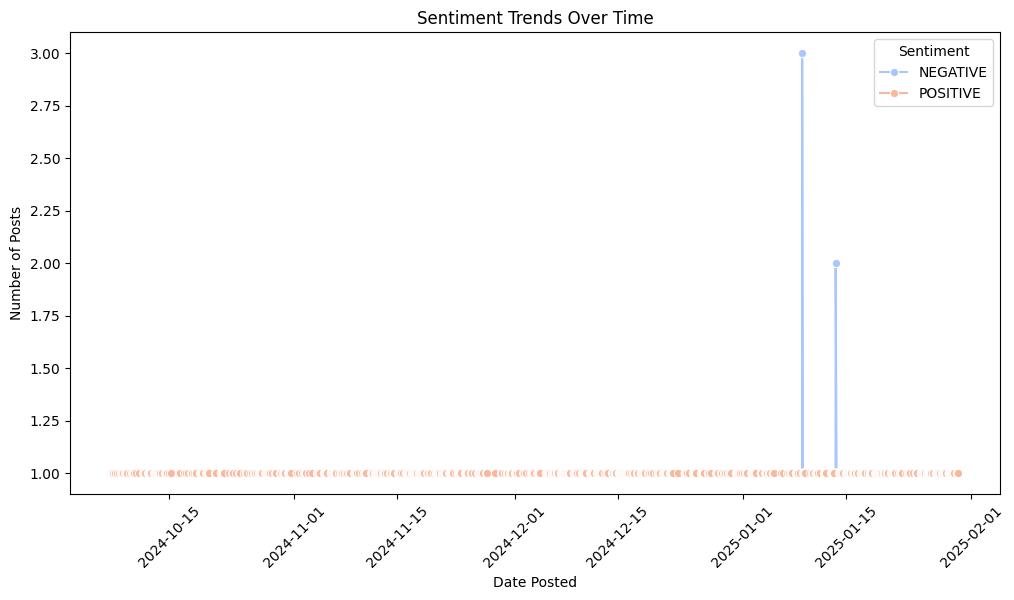

In [54]:
sentiment_trend = df.groupby(['date_posted', 'sentiment']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(x='date_posted', y='count', hue='sentiment', data=sentiment_trend, marker='o', palette='coolwarm')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date Posted')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [59]:
df['day_of_week'] = df['date_posted'].dt.day_name()
heatmap_data = df.groupby(['day_of_week', 'sentiment']).size().unstack()
print(heatmap_data)

sentiment    NEGATIVE  POSITIVE
day_of_week                    
Friday            334       118
Monday            379       114
Saturday          396       162
Sunday            360       141
Thursday          293       136
Tuesday           372       156
Wednesday         426       153


In [60]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

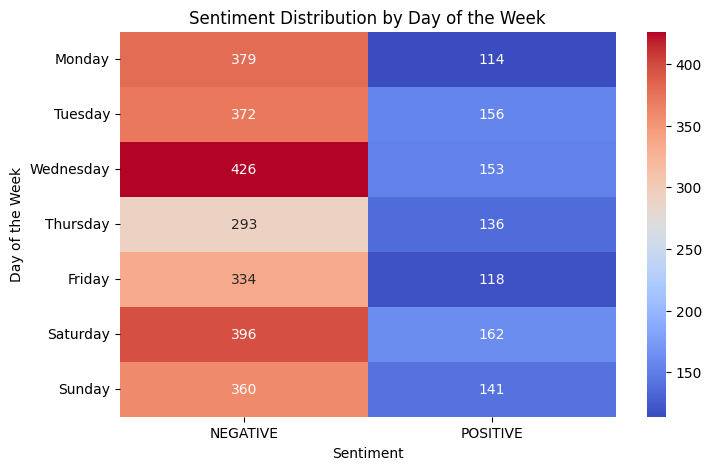

In [61]:
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Sentiment Distribution by Day of the Week')
plt.xlabel('Sentiment')
plt.ylabel('Day of the Week')
plt.show()


In [66]:
from wordcloud import WordCloud, STOPWORDS

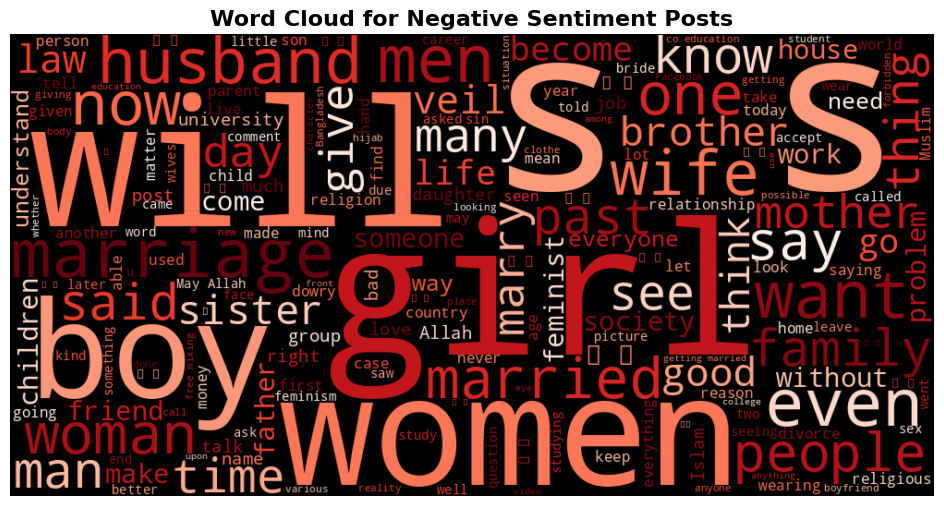

In [75]:
negative_text = ' '.join(df[df['sentiment'] == 'NEGATIVE']['translated_content'].dropna())

stopwords = set(STOPWORDS)

if negative_text.strip():
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='black',
        colormap='Reds',
        max_words=200,
        stopwords=stopwords,
        contour_width=3,
        contour_color='firebrick'
    ).generate(negative_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for Negative Sentiment Posts", fontsize=16, fontweight='bold', color='black')
    plt.show()
else:
    print("No negative sentiment found")
